In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import numpy as np

In [10]:
batch1 = 10000

(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_batch1 = X_train[:batch1]
y_batch1 = y_train[:batch1]
X_train_small, X_val_small, y_train_small, y_val_small = train_test_split(
    X_batch1, y_batch1, test_size=0.2, shuffle=True, random_state=42
)

y_train_1 = to_categorical(y_train, num_classes=10)
y_test_1  = to_categorical(y_test, num_classes=10)

In [3]:
def count_classes(y):
    y_flat = y.flatten()
    class_counts = np.bincount(y_flat, minlength=10)
    for cls, count in enumerate(class_counts):
        print(f"Class {cls}: {count}")
    
    return class_counts
    
count_classes(y_train)
count_classes(y_test)

Class 0: 5000
Class 1: 5000
Class 2: 5000
Class 3: 5000
Class 4: 5000
Class 5: 5000
Class 6: 5000
Class 7: 5000
Class 8: 5000
Class 9: 5000
Class 0: 1000
Class 1: 1000
Class 2: 1000
Class 3: 1000
Class 4: 1000
Class 5: 1000
Class 6: 1000
Class 7: 1000
Class 8: 1000
Class 9: 1000


array([1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000])

In [4]:
input_shape = (32, 32, 3)
num_classes = 10

inputs = tf.keras.Input(shape=input_shape)

x = layers.Conv2D(32, (3,3), padding='same', activation='relu')(inputs)
x = layers.Conv2D(32, (3,3), padding='same', activation='relu')(x)
x = layers.MaxPooling2D(pool_size=(2,2))(x)
x = layers.Dropout(0.3)(x)

x = layers.Conv2D(64, (3,3), padding='same', activation='relu')(x)
x = layers.Conv2D(64, (3,3), padding='same', activation='relu')(x)
x = layers.MaxPooling2D(pool_size=(2,2))(x)
x = layers.Dropout(0.5)(x)

x = layers.Conv2D(128, (3,3), padding='same', activation='relu')(x)
x = layers.Conv2D(128, (3,3), padding='same', activation='relu')(x)
x = layers.MaxPooling2D(pool_size=(2,2))(x)
x = layers.Dropout(0.5)(x)

x = layers.Flatten()(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.5)(x)

outputs = layers.Dense(num_classes, activation='softmax')(x)

model = models.Model(inputs=inputs, outputs=outputs, name="CIFAR-10-CNN-Classifier")
model.summary()

Model: "CIFAR-10-CNN-Classifier"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 8, 8, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 551,082 (2.10 MB)

 Trainable params: 550,826 (2.10 MB)

 Non-trainable params: 256 (1.00 KB)

In [5]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [6]:
history = model.fit(
    X_train, y_train_1,
    batch_size=64,
    epochs=20,
    shuffle=True
)

Epoch 1/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 43s 53ms/step - accuracy: 0.2107 - loss: 2.2259
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 42s 54ms/step - accuracy: 0.2548 - loss: 1.9512
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 44s 56ms/step - accuracy: 0.3257 - loss: 1.7721
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 43s 55ms/step - accuracy: 0.4108 - loss: 1.5779
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 42s 54ms/step - accuracy: 0.4696 - loss: 1.4583
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 43s 54ms/step - accuracy: 0.5245 - loss: 1.3232
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 53ms/step - accuracy: 0.5657 - loss: 1.2140
Epoch 8/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 52ms/step - accuracy: 0.5224 - loss: 1.3354
Epoch 9/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 53ms/step - accuracy: 0.6056 - loss: 1.1165
Epoch 10/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 44s 56ms/step - accuracy: 0.6401 - loss: 1.0367
Epoch 11/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 42s 53ms/step - accuracy: 0.6596 - loss: 0.9753
Epoch 12/20
782/782 ━━━━━━━━━━

In [7]:
model.save("CNN_CIFAR.keras")

In [11]:
train_loss, train_acc = model.evaluate(X_train, y_train_1, verbose=2)
print(f"Train accuracy: {train_acc}")
test_loss, test_acc = model.evaluate(X_test, y_test_1, verbose=2)
print(f"Test accuracy: {test_acc}")

1563/1563 - 13s - 8ms/step - accuracy: 0.8262 - loss: 0.5148
Train accuracy: 0.8261600136756897
313/313 - 2s - 8ms/step - accuracy: 0.7921 - loss: 0.6156
Test accuracy: 0.7921000123023987


In [7]:
from tensorflow.keras.models import load_model
model = load_model('CNN_CIFAR.keras')

D:\Packs\python\python3.13.0\Lib\site-packages\keras\src\saving\saving_lib.py:797: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 32 variables whereas the saved optimizer has 62 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step


In [13]:

from sklearn.metrics import accuracy_score, confusion_matrix, log_loss, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
def vis(y_test, y_pred):
    y_true = y_test.flatten()
    cm = confusion_matrix(y_true, y_pred)
    cifar10_classes = [
    'airplane', 'automobile', 'bird', 'cat', 'deer',
    'dog', 'frog', 'horse', 'ship', 'truck'
    ]

    plt.figure(figsize=(7, 6))
    plt.title('Confusion matrix', fontsize=16)
    plt.imshow(cm, cmap='Blues')
    plt.xticks(np.arange(10), cifar10_classes, rotation=45, fontsize=12)
    plt.yticks(np.arange(10), cifar10_classes, fontsize=12)
    plt.colorbar()
    plt.xlabel('Predicted', fontsize=14)
    plt.ylabel('True', fontsize=14)
    
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, cm[i, j],
                     ha='center', va='center',
                     color='white' if cm[i, j] > cm.max() / 2 else 'black',
                     fontsize=10)
    
    plt.tight_layout()
    plt.show()
    
    acc = accuracy_score(y_true, y_pred)
    precision_micro = precision_score(y_true, y_pred, average='micro')
    precision_macro = precision_score(y_true, y_pred, average='macro')
    recall_micro = recall_score(y_true, y_pred, average='micro')
    recall_macro = recall_score(y_true, y_pred, average='macro')
    f1_micro = f1_score(y_true, y_pred, average='micro')
    f1_macro = f1_score(y_true, y_pred, average='macro')
    
    print("Accuracy:", acc)
    print("Error rate:", 1 - acc)
    print("Precision micro:", precision_micro)
    print("Precision macro:", precision_macro)
    print("Recall micro:", recall_micro)
    print("Recall macro:", recall_macro)
    print("F1 micro:", f1_micro)
    print("F1 macro:", f1_macro)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


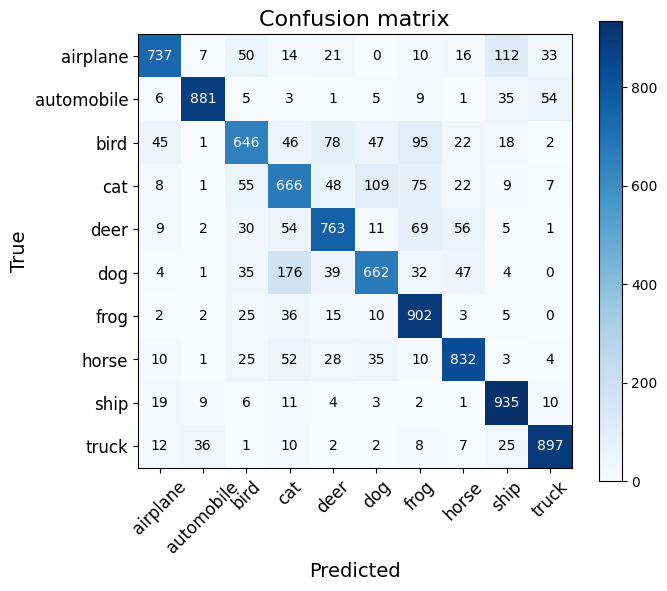

Accuracy: 0.7921
Error rate: 0.20789999999999997
Precision micro: 0.7921
Precision macro: 0.7945911622030385
Recall micro: 0.7921
Recall macro: 0.7920999999999999
F1 micro: 0.7921
F1 macro: 0.7909323175913983


In [14]:
y_pred_probs = model.predict(X_test)                     
y_pred = np.argmax(y_pred_probs, axis=1)


vis(y_test, y_pred)

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step


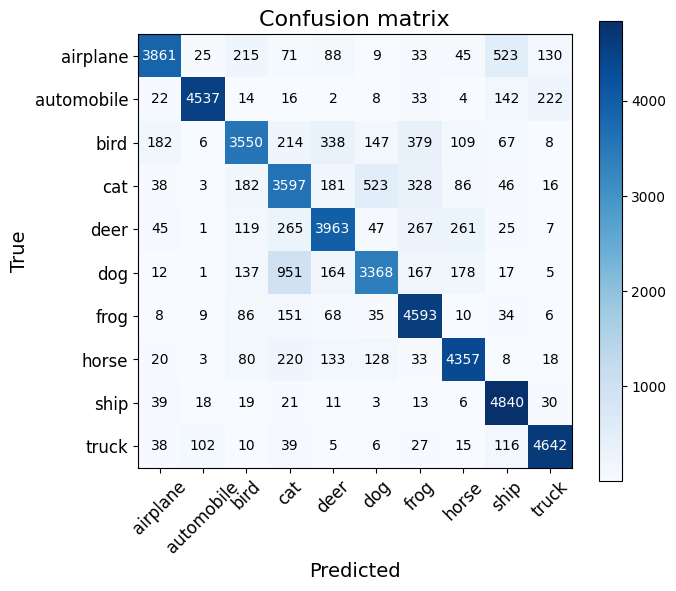

Accuracy: 0.82616
Error rate: 0.17384
Precision micro: 0.82616
Precision macro: 0.8297241213826411
Recall micro: 0.82616
Recall macro: 0.82616
F1 micro: 0.82616
F1 macro: 0.8253263980246961


In [16]:
y_pred_t_probs = model.predict(X_train)                     
y_pred_t = np.argmax(y_pred_t_probs, axis=1)

cifar10_classes = [
    'airplane', 'automobile', 'bird', 'cat', 'deer',
    'dog', 'frog', 'horse', 'ship', 'truck'
]

vis(y_train, y_pred_t)